# Validating NN Model

Using validation curves to validate the model performance 

In [10]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.001 using Stochastic Gradient Descent

In [11]:
#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
lr = 0.001

##initialize NN 
nn_lr001_sgd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)

##train NN (example uses mini-batch)
losses = nn_lr001_sgd.train(training_images, training_labels, epochs = 10, batch_size=64) #, debug=True, info_skip=1000)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1

##test NN
nn_lr001_sgd_cross_ent_error, nn_lr001_sgd_classification_error = nn_lr001_sgd.test(test_images, test_labels)

 10%|█         | 1/10 [00:33<05:01, 33.49s/it]

epoch loss:  63.840142954070544


 20%|██        | 2/10 [01:14<05:04, 38.05s/it]

epoch loss:  18.74624845030836


 30%|███       | 3/10 [02:02<04:56, 42.41s/it]

epoch loss:  12.49333919475456


 40%|████      | 4/10 [02:47<04:20, 43.41s/it]

epoch loss:  9.268357949028912


 50%|█████     | 5/10 [03:31<03:38, 43.80s/it]

epoch loss:  7.175126251496662


 60%|██████    | 6/10 [04:18<02:59, 44.80s/it]

epoch loss:  5.6984593066115625


 70%|███████   | 7/10 [05:04<02:15, 45.32s/it]

epoch loss:  4.597134672682886


 80%|████████  | 8/10 [05:46<01:27, 43.98s/it]

epoch loss:  3.7433011895845976


 90%|█████████ | 9/10 [06:30<00:44, 44.11s/it]

epoch loss:  3.080346405273317


100%|██████████| 10/10 [07:12<00:00, 43.24s/it]


epoch loss:  2.5552855792951084
Average cross entropy loss: 2.249163408121949
Classification accuracy: 73.96000000000001%


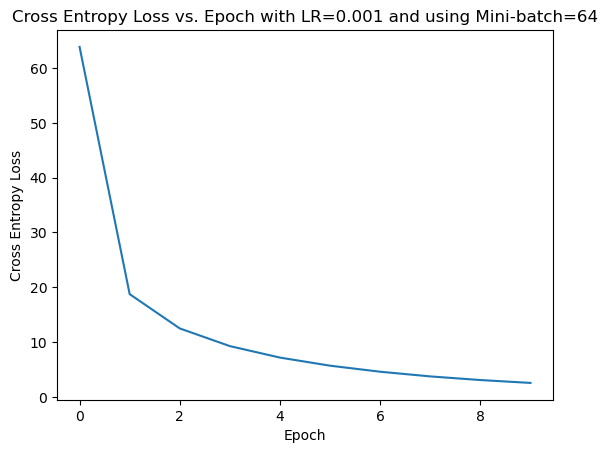

In [12]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.001 and using Mini-batch=64')
plt.show()

In [13]:
error_summary = stats.describe(nn_lr001_sgd_cross_ent_error)
print("mean: ", np.mean(nn_lr001_sgd_cross_ent_error))
print("median: ", np.median(nn_lr001_sgd_cross_ent_error))
print("min: ", np.min(nn_lr001_sgd_cross_ent_error))
print("max: ", np.max(nn_lr001_sgd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr001_sgd_cross_ent_error, q=[10, 25, 50, 75, 90]))
# print("mean: ", np.median(test_loss))

mean:  2.249163408121949
median:  0.015725037711341868
min:  -0.0
max:  157.8634716091066
variance:  59.72283452207237
skewness:  7.450146127175743
kurtosis:  79.84339130849365
quartile:  [-0.00000000e+00  1.19050941e-08  1.57250377e-02  8.35564582e-01
  5.45953789e+00]


In [14]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN
from scipy import stats
import numpy as np

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.001
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, batch_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader, debug=True)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Step [100/938], Loss: 2.3063


Epoch [1/10], Step [200/938], Loss: 2.2902


Epoch [1/10], Step [300/938], Loss: 2.2996


Epoch [1/10], Step [400/938], Loss: 2.2986


436it [00:02, 177.29it/s]


Epoch [1/10], Step [500/938], Loss: 2.2875


533it [00:02, 181.66it/s]

Epoch [1/10], Step [600/938], Loss: 2.2997


Epoch [1/10], Step [700/938], Loss: 2.2896


Epoch [1/10], Step [800/938], Loss: 2.2731


839it [00:04, 185.65it/s]

Epoch [1/10], Step [900/938], Loss: 2.2789


938it [00:05, 181.51it/s]
 10%|█         | 1/10 [00:05<00:46,  5.17s/it]

batch loss:  [2.3029441833496094, 2.30005145072937, 2.3097288608551025, 2.300675630569458, 2.3024332523345947, 2.313344717025757, 2.3050761222839355, 2.3022501468658447, 2.291989803314209, 2.2969748973846436, 2.313706398010254, 2.32768177986145, 2.321925640106201, 2.2910635471343994, 2.3127763271331787, 2.2999913692474365, 2.2947304248809814, 2.317394495010376, 2.320995807647705, 2.313735246658325, 2.3124213218688965, 2.3049120903015137, 2.300874948501587, 2.310750961303711, 2.292464017868042, 2.3058254718780518, 2.302220106124878, 2.2905030250549316, 2.2991628646850586, 2.3112354278564453, 2.3070273399353027, 2.3197479248046875, 2.304555654525757, 2.302156925201416, 2.2988197803497314, 2.307772159576416, 2.318448305130005, 2.3053014278411865, 2.3093039989471436, 2.296482801437378, 2.304966688156128, 2.299177885055542, 2.3121471405029297, 2.2926137447357178, 2.2991116046905518, 2.3046815395355225, 2.308328628540039, 2.3040359020233154, 2.2919962406158447, 2.308079481124878, 2.314891338

Epoch [2/10], Step [100/938], Loss: 2.2818


137it [00:00, 188.81it/s]

Epoch [2/10], Step [200/938], Loss: 2.2765


Epoch [2/10], Step [300/938], Loss: 2.2706


Epoch [2/10], Step [400/938], Loss: 2.2578


Epoch [2/10], Step [500/938], Loss: 2.2572


Epoch [2/10], Step [600/938], Loss: 2.2531


Epoch [2/10], Step [700/938], Loss: 2.2521


730it [00:04, 160.37it/s]

Epoch [2/10], Step [800/938], Loss: 2.2482


Epoch [2/10], Step [900/938], Loss: 2.2453


938it [00:05, 180.43it/s]
 20%|██        | 2/10 [00:10<00:41,  5.19s/it]

batch loss:  [2.271017551422119, 2.273343563079834, 2.2881405353546143, 2.277491331100464, 2.2799506187438965, 2.2769949436187744, 2.28368878364563, 2.2837252616882324, 2.2761740684509277, 2.2836008071899414, 2.2714269161224365, 2.28606915473938, 2.2727441787719727, 2.2811055183410645, 2.283128261566162, 2.280489921569824, 2.2752254009246826, 2.2859437465667725, 2.273174285888672, 2.273534059524536, 2.2760488986968994, 2.28066086769104, 2.271317481994629, 2.2771100997924805, 2.2772631645202637, 2.279148578643799, 2.272742986679077, 2.2701194286346436, 2.286176919937134, 2.2631595134735107, 2.2887744903564453, 2.279690742492676, 2.2674560546875, 2.2710623741149902, 2.2797911167144775, 2.2787957191467285, 2.2819571495056152, 2.277071952819824, 2.275855779647827, 2.2675869464874268, 2.2765932083129883, 2.281463146209717, 2.281902313232422, 2.2781388759613037, 2.2781870365142822, 2.2932653427124023, 2.286944627761841, 2.2811055183410645, 2.2681407928466797, 2.268855571746826, 2.28650259971

Epoch [3/10], Step [100/938], Loss: 2.2339


134it [00:00, 156.66it/s]

Epoch [3/10], Step [200/938], Loss: 2.2329


Epoch [3/10], Step [300/938], Loss: 2.2125


Epoch [3/10], Step [400/938], Loss: 2.2208


Epoch [3/10], Step [500/938], Loss: 2.2056


Epoch [3/10], Step [600/938], Loss: 2.2078


Epoch [3/10], Step [700/938], Loss: 2.1989


Epoch [3/10], Step [800/938], Loss: 2.1977


Epoch [3/10], Step [900/938], Loss: 2.1758


938it [00:05, 161.31it/s]
 30%|███       | 3/10 [00:16<00:38,  5.48s/it]

batch loss:  [2.2423439025878906, 2.2374417781829834, 2.2483654022216797, 2.248060464859009, 2.244112730026245, 2.245238780975342, 2.25272536277771, 2.2327980995178223, 2.2321605682373047, 2.2479259967803955, 2.251051425933838, 2.236426830291748, 2.2562263011932373, 2.2450568675994873, 2.238645315170288, 2.252089500427246, 2.2487502098083496, 2.2424826622009277, 2.2420356273651123, 2.2458341121673584, 2.240515947341919, 2.243293046951294, 2.2380588054656982, 2.237191677093506, 2.240522623062134, 2.2376434803009033, 2.2442803382873535, 2.2313504219055176, 2.243396043777466, 2.240657329559326, 2.230276584625244, 2.251519203186035, 2.2433032989501953, 2.2357356548309326, 2.238054037094116, 2.2513420581817627, 2.252047538757324, 2.2492218017578125, 2.2458035945892334, 2.2348151206970215, 2.2447729110717773, 2.246332883834839, 2.2404890060424805, 2.244269371032715, 2.247732639312744, 2.236321210861206, 2.2552952766418457, 2.237251043319702, 2.2510223388671875, 2.2316715717315674, 2.23103761

Epoch [4/10], Step [100/938], Loss: 2.1934


130it [00:00, 176.64it/s]

Epoch [4/10], Step [200/938], Loss: 2.1669


Epoch [4/10], Step [300/938], Loss: 2.1725


Epoch [4/10], Step [400/938], Loss: 2.1344


Epoch [4/10], Step [500/938], Loss: 2.1463


533it [00:03, 167.90it/s]

Epoch [4/10], Step [600/938], Loss: 2.1359


Epoch [4/10], Step [700/938], Loss: 2.0972


728it [00:04, 160.42it/s]

Epoch [4/10], Step [800/938], Loss: 2.1108


Epoch [4/10], Step [900/938], Loss: 2.0683


938it [00:05, 166.46it/s]
 40%|████      | 4/10 [00:21<00:33,  5.54s/it]

batch loss:  [2.1678550243377686, 2.194868326187134, 2.173797845840454, 2.1650121212005615, 2.1988532543182373, 2.176576614379883, 2.180650472640991, 2.1770098209381104, 2.160325050354004, 2.1859443187713623, 2.167505979537964, 2.1839661598205566, 2.17630672454834, 2.2044506072998047, 2.194863796234131, 2.1992971897125244, 2.2100300788879395, 2.173825263977051, 2.1882224082946777, 2.145202398300171, 2.1731061935424805, 2.1874234676361084, 2.188286542892456, 2.173535108566284, 2.1937806606292725, 2.1696362495422363, 2.18182373046875, 2.167574882507324, 2.1751978397369385, 2.1876068115234375, 2.2337355613708496, 2.1754226684570312, 2.1767566204071045, 2.169447422027588, 2.176931142807007, 2.1766068935394287, 2.1903557777404785, 2.1734540462493896, 2.198207139968872, 2.1813642978668213, 2.173151731491089, 2.1915740966796875, 2.164877414703369, 2.1598870754241943, 2.1596860885620117, 2.1514391899108887, 2.173039674758911, 2.168151617050171, 2.185361862182617, 2.159045696258545, 2.183193683

Epoch [5/10], Step [100/938], Loss: 2.0637


Epoch [5/10], Step [200/938], Loss: 2.0318


Epoch [5/10], Step [300/938], Loss: 1.9988


Epoch [5/10], Step [400/938], Loss: 1.9974


Epoch [5/10], Step [500/938], Loss: 2.0067


531it [00:03, 165.64it/s]


Epoch [5/10], Step [600/938], Loss: 1.9981


632it [00:03, 157.69it/s]

Epoch [5/10], Step [700/938], Loss: 1.9814


Epoch [5/10], Step [800/938], Loss: 1.9445


Epoch [5/10], Step [900/938], Loss: 1.9012


938it [00:05, 166.41it/s]
 50%|█████     | 5/10 [00:27<00:27,  5.58s/it]

batch loss:  [2.115116834640503, 2.0970444679260254, 2.079575777053833, 2.0925490856170654, 2.086249828338623, 2.076026201248169, 2.0519158840179443, 2.065629482269287, 2.0565078258514404, 2.108637571334839, 2.038797616958618, 2.066779136657715, 2.09649395942688, 2.0665292739868164, 2.0966546535491943, 2.012899160385132, 2.065484046936035, 2.0767574310302734, 2.0742838382720947, 2.083327531814575, 2.1185011863708496, 2.1295809745788574, 2.087555170059204, 2.036675214767456, 2.0616142749786377, 2.043657064437866, 2.1010098457336426, 2.083531379699707, 2.052530527114868, 2.0743720531463623, 2.0730507373809814, 2.0593411922454834, 2.0539331436157227, 2.0740928649902344, 2.065382719039917, 2.070225715637207, 2.1187167167663574, 2.10099196434021, 2.0968525409698486, 2.096190929412842, 2.0500218868255615, 2.120427131652832, 2.08083438873291, 2.1015384197235107, 2.0789175033569336, 2.0821399688720703, 2.080230951309204, 2.0733089447021484, 2.0446040630340576, 2.129070520401001, 2.068379640579

Epoch [6/10], Step [100/938], Loss: 1.9078


Epoch [6/10], Step [200/938], Loss: 1.8446


Epoch [6/10], Step [300/938], Loss: 1.8965


Epoch [6/10], Step [400/938], Loss: 1.8507


Epoch [6/10], Step [500/938], Loss: 1.7941


531it [00:03, 164.89it/s]

Epoch [6/10], Step [600/938], Loss: 1.8379


Epoch [6/10], Step [700/938], Loss: 1.7173


Epoch [6/10], Step [800/938], Loss: 1.8266


Epoch [6/10], Step [900/938], Loss: 1.6689


938it [00:05, 158.94it/s]
 60%|██████    | 6/10 [00:33<00:22,  5.69s/it]

batch loss:  [1.9332822561264038, 1.9489856958389282, 1.9396039247512817, 1.9359183311462402, 1.9358643293380737, 1.9324228763580322, 1.9171253442764282, 1.8838770389556885, 1.9121897220611572, 1.9799641370773315, 1.941751480102539, 1.9443089962005615, 1.9237209558486938, 1.9062649011611938, 1.9103816747665405, 1.932511329650879, 1.930445909500122, 1.958126187324524, 1.9120337963104248, 1.9911094903945923, 1.8972777128219604, 1.9014166593551636, 1.9599344730377197, 1.9371068477630615, 1.9473731517791748, 1.9176801443099976, 1.92169988155365, 1.9544382095336914, 1.9134352207183838, 1.9503490924835205, 1.8841383457183838, 1.9294352531433105, 1.9997673034667969, 1.9780253171920776, 1.9525593519210815, 1.9279510974884033, 1.9327499866485596, 1.876901388168335, 1.9168754816055298, 1.8799493312835693, 1.988044023513794, 1.9589351415634155, 1.9450865983963013, 1.980588436126709, 1.8952062129974365, 1.8982152938842773, 1.9027901887893677, 1.9589470624923706, 1.9157946109771729, 1.9599406719207

Epoch [7/10], Step [100/938], Loss: 1.7537


Epoch [7/10], Step [200/938], Loss: 1.6654


Epoch [7/10], Step [300/938], Loss: 1.5327


Epoch [7/10], Step [400/938], Loss: 1.5468


Epoch [7/10], Step [500/938], Loss: 1.5789


Epoch [7/10], Step [600/938], Loss: 1.4904


Epoch [7/10], Step [700/938], Loss: 1.5042


Epoch [7/10], Step [800/938], Loss: 1.4907


Epoch [7/10], Step [900/938], Loss: 1.4958


938it [00:05, 172.51it/s]
 70%|███████   | 7/10 [00:38<00:16,  5.61s/it]

batch loss:  [1.7190412282943726, 1.5919979810714722, 1.6965904235839844, 1.6997661590576172, 1.6491235494613647, 1.6602885723114014, 1.6483042240142822, 1.6738923788070679, 1.783695101737976, 1.6541932821273804, 1.6354289054870605, 1.727043628692627, 1.6586723327636719, 1.615423321723938, 1.7200678586959839, 1.7044438123703003, 1.647795557975769, 1.753557562828064, 1.6432467699050903, 1.588747262954712, 1.593662977218628, 1.709655523300171, 1.735636830329895, 1.7451547384262085, 1.7189273834228516, 1.7629590034484863, 1.748236060142517, 1.7197792530059814, 1.690686583518982, 1.6459051370620728, 1.7351890802383423, 1.735088586807251, 1.7551640272140503, 1.682735800743103, 1.710192084312439, 1.7624189853668213, 1.6016497611999512, 1.6475629806518555, 1.6339552402496338, 1.6164002418518066, 1.6536097526550293, 1.64622163772583, 1.6834114789962769, 1.656129240989685, 1.6917269229888916, 1.6273157596588135, 1.661007046699524, 1.6538845300674438, 1.6030311584472656, 1.6460297107696533, 1.79

Epoch [8/10], Step [100/938], Loss: 1.3284


130it [00:00, 170.15it/s]


Epoch [8/10], Step [200/938], Loss: 1.3867


237it [00:01, 169.74it/s]

Epoch [8/10], Step [300/938], Loss: 1.3557


Epoch [8/10], Step [400/938], Loss: 1.2378


Epoch [8/10], Step [500/938], Loss: 1.2486


Epoch [8/10], Step [600/938], Loss: 1.2865


Epoch [8/10], Step [700/938], Loss: 1.1279


Epoch [8/10], Step [800/938], Loss: 1.1877


938it [00:05, 167.55it/s]

Epoch [8/10], Step [900/938], Loss: 1.1023



 80%|████████  | 8/10 [00:44<00:11,  5.61s/it]

batch loss:  [1.4130854606628418, 1.338219165802002, 1.4723551273345947, 1.4375474452972412, 1.4285751581192017, 1.4909148216247559, 1.417564034461975, 1.458261251449585, 1.3536782264709473, 1.4506667852401733, 1.3055675029754639, 1.4789927005767822, 1.396586537361145, 1.476931095123291, 1.4054114818572998, 1.3824867010116577, 1.3746651411056519, 1.360738754272461, 1.4233793020248413, 1.264297366142273, 1.3469562530517578, 1.2729809284210205, 1.3743866682052612, 1.3543661832809448, 1.40536367893219, 1.3323187828063965, 1.4098705053329468, 1.3115050792694092, 1.459390640258789, 1.3543522357940674, 1.4593092203140259, 1.368323564529419, 1.3010982275009155, 1.3827842473983765, 1.4231499433517456, 1.3663649559020996, 1.3020764589309692, 1.363584280014038, 1.3450597524642944, 1.3724294900894165, 1.3292235136032104, 1.3069651126861572, 1.3329718112945557, 1.3335905075073242, 1.387026071548462, 1.3209748268127441, 1.257096290588379, 1.3386974334716797, 1.4076424837112427, 1.486143708229065, 1

Epoch [9/10], Step [100/938], Loss: 1.1294


Epoch [9/10], Step [200/938], Loss: 1.0289


236it [00:01, 194.43it/s]

Epoch [9/10], Step [300/938], Loss: 1.0067


Epoch [9/10], Step [400/938], Loss: 1.0590


Epoch [9/10], Step [500/938], Loss: 1.0282


542it [00:02, 188.82it/s]

Epoch [9/10], Step [600/938], Loss: 0.9118


Epoch [9/10], Step [700/938], Loss: 0.9262


Epoch [9/10], Step [800/938], Loss: 1.0513


840it [00:04, 178.80it/s]

Epoch [9/10], Step [900/938], Loss: 0.9343


938it [00:04, 188.45it/s]
 90%|█████████ | 9/10 [00:49<00:05,  5.41s/it]

batch loss:  [1.1262352466583252, 1.0886316299438477, 1.1041321754455566, 1.235562801361084, 1.0611536502838135, 0.9683066606521606, 1.0401438474655151, 1.143457055091858, 1.18051278591156, 1.144989013671875, 1.0683295726776123, 1.1482492685317993, 1.1207609176635742, 1.130154013633728, 1.1404694318771362, 1.0395536422729492, 1.156059741973877, 1.0396788120269775, 1.1515109539031982, 1.093778133392334, 1.178941011428833, 1.0156209468841553, 1.109771728515625, 1.121617078781128, 1.0901002883911133, 1.2989007234573364, 0.9805759191513062, 0.9632089734077454, 1.0996613502502441, 1.0327917337417603, 1.0283070802688599, 1.1484490633010864, 1.1612892150878906, 1.0935736894607544, 1.0114293098449707, 1.0278626680374146, 1.2318521738052368, 1.0916497707366943, 1.038651943206787, 1.0560671091079712, 1.0043352842330933, 1.0200185775756836, 1.0752286911010742, 1.120556116104126, 1.0390267372131348, 1.0524312257766724, 0.9911847710609436, 0.9662365913391113, 1.1024773120880127, 1.1469815969467163,

Epoch [10/10], Step [100/938], Loss: 0.9028


Epoch [10/10], Step [200/938], Loss: 0.9233


Epoch [10/10], Step [300/938], Loss: 0.9737


Epoch [10/10], Step [400/938], Loss: 0.9064


Epoch [10/10], Step [500/938], Loss: 0.9865


Epoch [10/10], Step [600/938], Loss: 0.7958


Epoch [10/10], Step [700/938], Loss: 0.8301


Epoch [10/10], Step [800/938], Loss: 0.8279


Epoch [10/10], Step [900/938], Loss: 0.8842


938it [00:04, 189.86it/s]
100%|██████████| 10/10 [00:54<00:00,  5.44s/it]

batch loss:  [0.8975201845169067, 0.9498482942581177, 0.8779579401016235, 0.8948075175285339, 0.9894309043884277, 0.911034882068634, 0.8137767910957336, 0.8296656608581543, 0.8558273315429688, 0.7700178027153015, 0.8035459518432617, 0.8336871266365051, 0.8736487030982971, 1.1592289209365845, 0.8611840605735779, 0.9150680899620056, 0.9062836766242981, 0.9425221681594849, 0.8558334708213806, 0.9723999500274658, 1.014983057975769, 0.9555785059928894, 0.8530663251876831, 1.064963936805725, 0.9750911593437195, 0.8086770176887512, 0.9549317955970764, 1.076519250869751, 0.7604755759239197, 0.9356212615966797, 0.839614748954773, 0.8095881342887878, 0.9672293066978455, 0.8228927254676819, 0.7750308513641357, 0.8420209884643555, 0.8390369415283203, 1.0222537517547607, 0.9159258008003235, 0.8915438652038574, 0.8389660120010376, 0.81287682056427, 0.987190842628479, 0.9011420607566833, 1.0984621047973633, 0.8905779123306274, 0.7835730910301208, 1.0084528923034668, 0.9411040544509888, 0.977081775665

[2.2928994817774435,
 2.263460952590015,
 2.2167222032160647,
 2.1386370544494597,
 2.0111676327455275,
 1.811609126611559,
 1.5362400369349318,
 1.241524248870451,
 1.008701195340675,
 0.8527639867908665]

In [15]:
##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

Average cross entropy loss: 0.77542055
Classification accuracy: 80.92%


In [16]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

# print("mean: ", np.mean(cross_ent_errors))
# print("median: ", np.median(cross_ent_errors))
# print("min: ", np.min(cross_ent_errors))
# print("max: ", np.max(cross_ent_errors))
# print("variance: ", stats.describe(cross_ent_errors).variance)
# print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

mean:  0.77542055
median:  0.7711373
min:  0.5590137
max:  1.0143553
variance:  0.005866549944934936
skewness:  0.18423733499144326
kurtosis:  0.2089878569259498
quartile:  [0.67536536 0.73124337 0.7711373  0.81863672 0.87554283]
